In [43]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [44]:
# Load data from the pickle file

with open ('capacitor_dataset.pickle' , 'rb') as f:
    capacitor_data = pickle.load(f) 

# print(capacitor_data)

In [45]:
# Extract time and charge values from the data
Time = [[x] for x in capacitor_data[:,0]]    # seperating x point and y point in different array
charge = [[x] for x in capacitor_data[:,1]]
Time = np.vstack(Time)
# print(Time)
# print(charge)



In [46]:
# Converting the equation into a linear equation bt applying log 
charge_in_log = np.log(charge)


# Setting the linear regression model and fit the transformed data
modal = LinearRegression().fit(Time , charge_in_log)




In [47]:
# We have the equation 
#  Q = C.V.e^-t/RC
#  log(Q) = -t/RC + log(CV)
#  y = mx + c

# So slope = -t/RC                  given V = 5volt
# and intercept = log (5C)
C = np.exp(modal.intercept_)/5
R = -1/(modal.coef_*C)

print(f"Estimated capacitance (C) = {C} F")
print(f"Estimated resistance (R) = {R[0]} Ω")# Plot the original data and the regression line


Estimated capacitance (C) = [5.e-05] F
Estimated resistance (R) = [100000.00000001] Ω


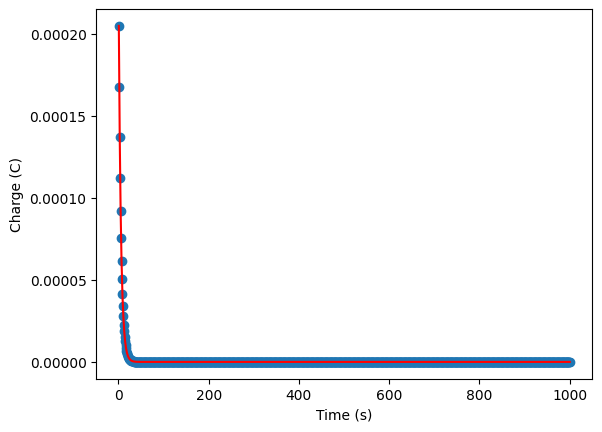

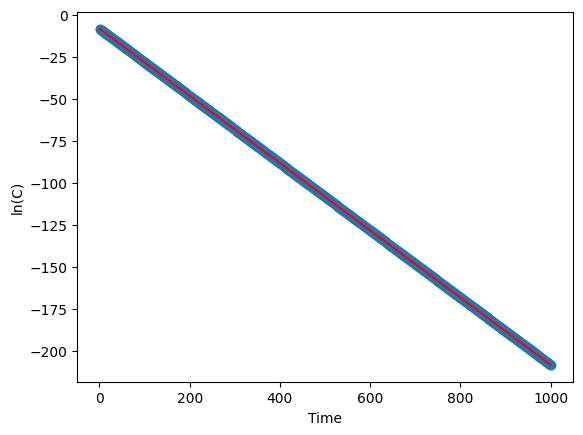

In [49]:
# Graph plotting 

plt.scatter(Time , charge , label = "Original Data")
plt.plot(Time, 5*C*np.exp(-Time/(R*C)), 'r-', label="Regression Line")
plt.xlabel('Time (s)')
plt.ylabel('Charge (C)')
plt.show()


# logarithmic plot 

plt.scatter(Time , charge_in_log , label = "Original Data" )
plt.plot(Time, modal.coef_*Time + modal.intercept_, 'r-', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('ln(C)')
plt.show()
